# Data Visualization

Data visualization helps capturing other aspects of the Data

- Matplotlib
- Seaborn
- ggplot (TODO)
- Bokeh (TODO)

## Matplotlib

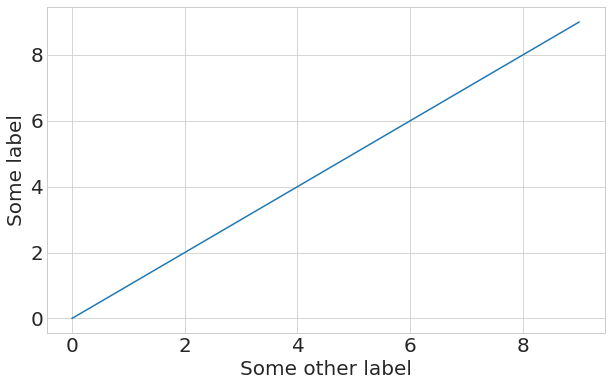

In [1]:
#lets do a simple plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(10, 6))

plt.plot(range(10))
plt.ylabel("Some label", fontsize=20)
plt.xlabel("Some other label", fontsize=20)
plt.tick_params(labelsize=20)

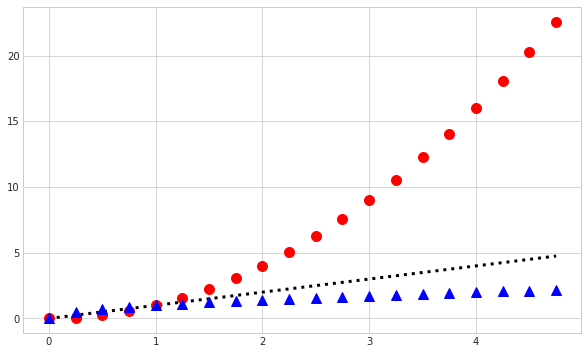

In [3]:
# multiple curves on the same graph
import numpy as np

x = np.arange(20) / 4.0
y1 = x ** 2
y2 = x ** 0.5


plt.figure(figsize=(10, 6))
plt.savefig("foo.pdf")
plt.plot(x, x, "k:", x, y1, "ro", x, y2, "b^", linewidth=3, ms=10)
# or markersize
# plt.savefig('foo.pdf')
# plt.close()


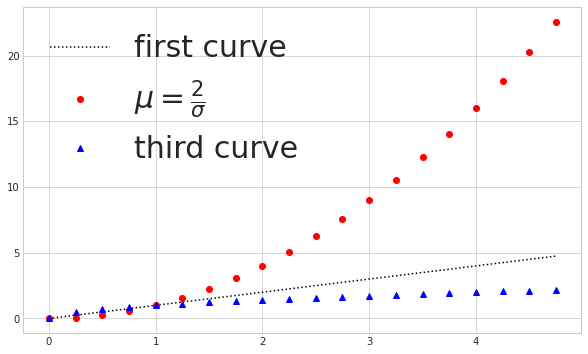

In [4]:
# equivalent
x = np.arange(20) / 4.0
y1 = x ** 2
y2 = x ** 0.5

plt.figure(figsize=(10, 6))

plt.plot(x, x, "k:", label="first curve")
plt.plot(x, y1, "ro", label=r"$\mu=\frac{2}{\sigma}$")
plt.plot(x, y2, "b^", label="third curve")
plt.legend(fontsize=30, loc="best")


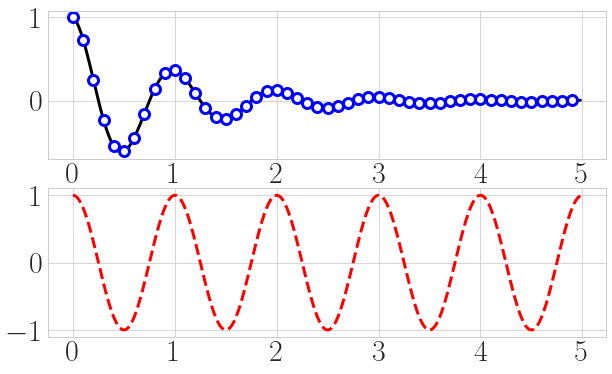

In [17]:
## multiple figures
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)


t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10, 6))
plt.rc("text", usetex=True)
plt.tick_params(labelsize=30)

plt.subplot(211)  # row number, column number, figure number
plt.plot(
    t2,
    f(t2),
    "k",
    t1,
    f(t1),
    "bo",
    lw=3,  # linewidth
    ms=10,  # markersize
    mfc="w",  # or markerfacecolors
    mew=3,
)
plt.tick_params(labelsize=30)

plt.subplot(212)
plt.plot(t2, np.cos(2 * np.pi * t2), "r--", lw=3, ms=10)
plt.tick_params(labelsize=30)
plt.show()


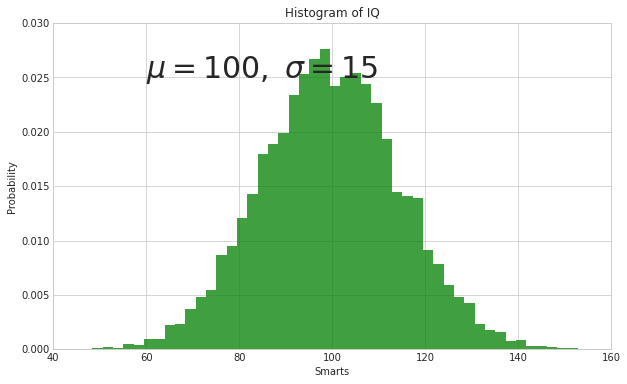

In [9]:
# With text
import numpy as np

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(x, 50, density=True, facecolor="g", alpha=0.75)

plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title("Histogram of IQ")
plt.text(60, 0.025, r"$\mu=100,\ \sigma=15$", fontsize=30)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)


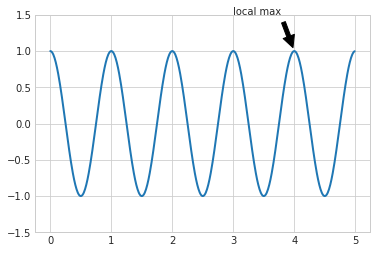

In [10]:
## annotation

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
(line,) = plt.plot(t, s, lw=2)

plt.annotate(
    "local max",
    xy=(4, 1),
    xytext=(3, 1.5),
    arrowprops=dict(facecolor="black", shrink=0.1),
)

plt.ylim(-1.5, 1.5)


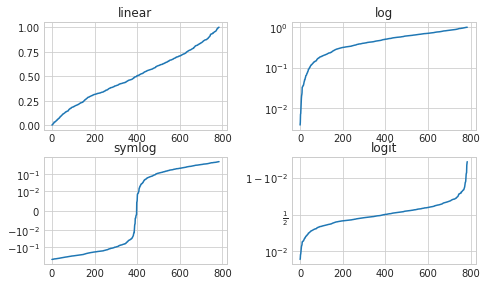

In [12]:
%matplotlib inline
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
# plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
from matplotlib.ticker import NullFormatter
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=3, right=4, hspace=0.25,
                    wspace=0.35);


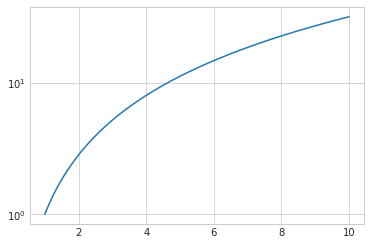

In [13]:
x = np.linspace(1, 10, 200)
y = np.power(x, 3.0 / 2.0)
plt.semilogy(x, y)


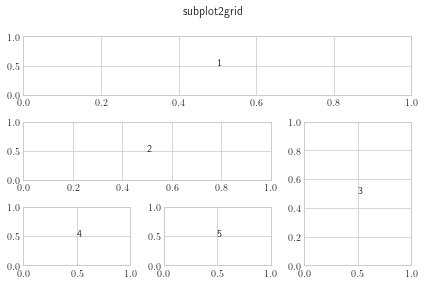

In [16]:
# subplot2grid

plt.figure(0)
plt.rc("text", usetex=True)

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.text(0.5, 0.5, "1")
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2.text(0.5, 0.5, "2")
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.text(0.5, 0.5, "3")
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.text(0.5, 0.5, "4")
ax5 = plt.subplot2grid((3, 3), (2, 1))
ax5.text(0.5, 0.5, "5")

plt.suptitle("subplot2grid")
plt.tight_layout()


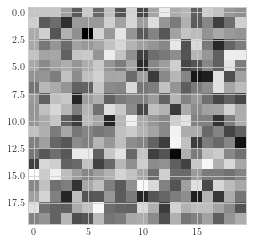

In [18]:
# heatmap
plt.imshow(np.random.normal(size=(20, 20)))


In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)
text = plt.text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=30)

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
#     fig.text()
    im.set_array(f(x, y))
    text.set_text("Test")
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=100, interval=50, blit=True)



<IPython.core.display.Javascript object>

## Seaborn

In [23]:
## Loading the data

import seaborn as sns

titanic_df = sns.load_dataset("titanic")
titanic_df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Distribution plots

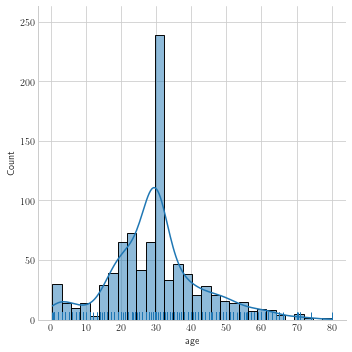

In [34]:
sns.displot(
    x=titanic_df["age"].fillna(titanic_df["age"].mean()),
    kde=True,  # Kernel density estimation: many gaussians for each observations summed
    rug=True,
    legend=True,
)


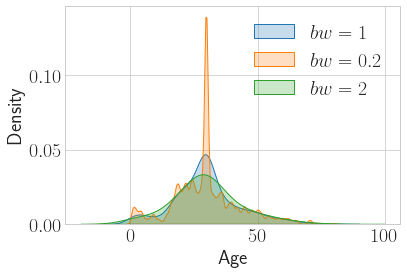

In [36]:
sns.kdeplot(
    titanic_df["age"].fillna(titanic_df["age"].mean()), shade=True, label=r"$bw=1$"
)
sns.kdeplot(
    titanic_df["age"].fillna(titanic_df["age"].mean()),
    bw_adjust=0.2,
    shade=True,
    label=r"$bw=0.2$",
)
sns.kdeplot(
    titanic_df["age"].fillna(titanic_df["age"].mean()),
    bw_adjust=2,
    shade=True,
    label=r"$bw=2$",
)

plt.xlabel("Age", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)


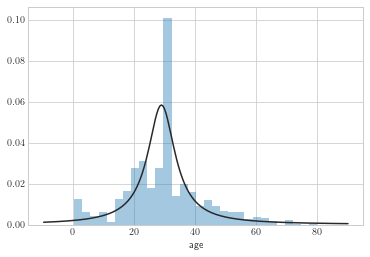

In [43]:
## fitting
from scipy import stats

sns.distplot(
    titanic_df["age"].fillna(titanic_df["age"].mean()),
    kde=False,
    fit=stats.cauchy,
)


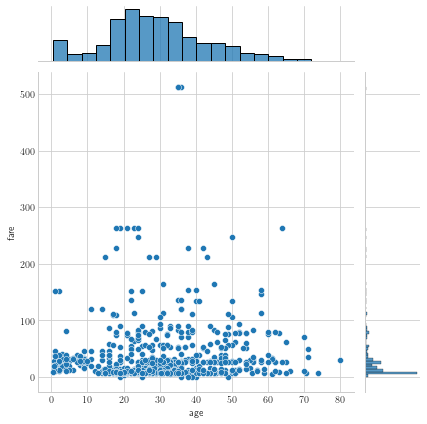

In [44]:
## joinplots

sns.jointplot(x="age", y="fare", data=titanic_df)


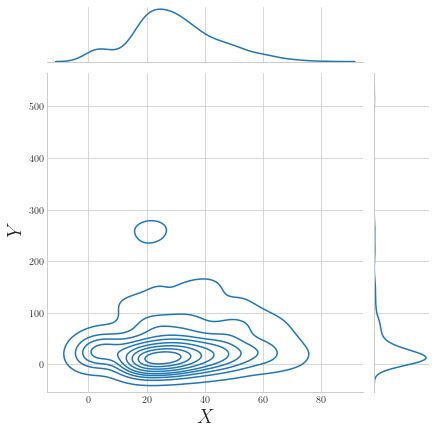

In [45]:
g = sns.jointplot(x="age", y="fare", data=titanic_df, kind="kde")
g.set_axis_labels("$X$", "$Y$", fontsize=20)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

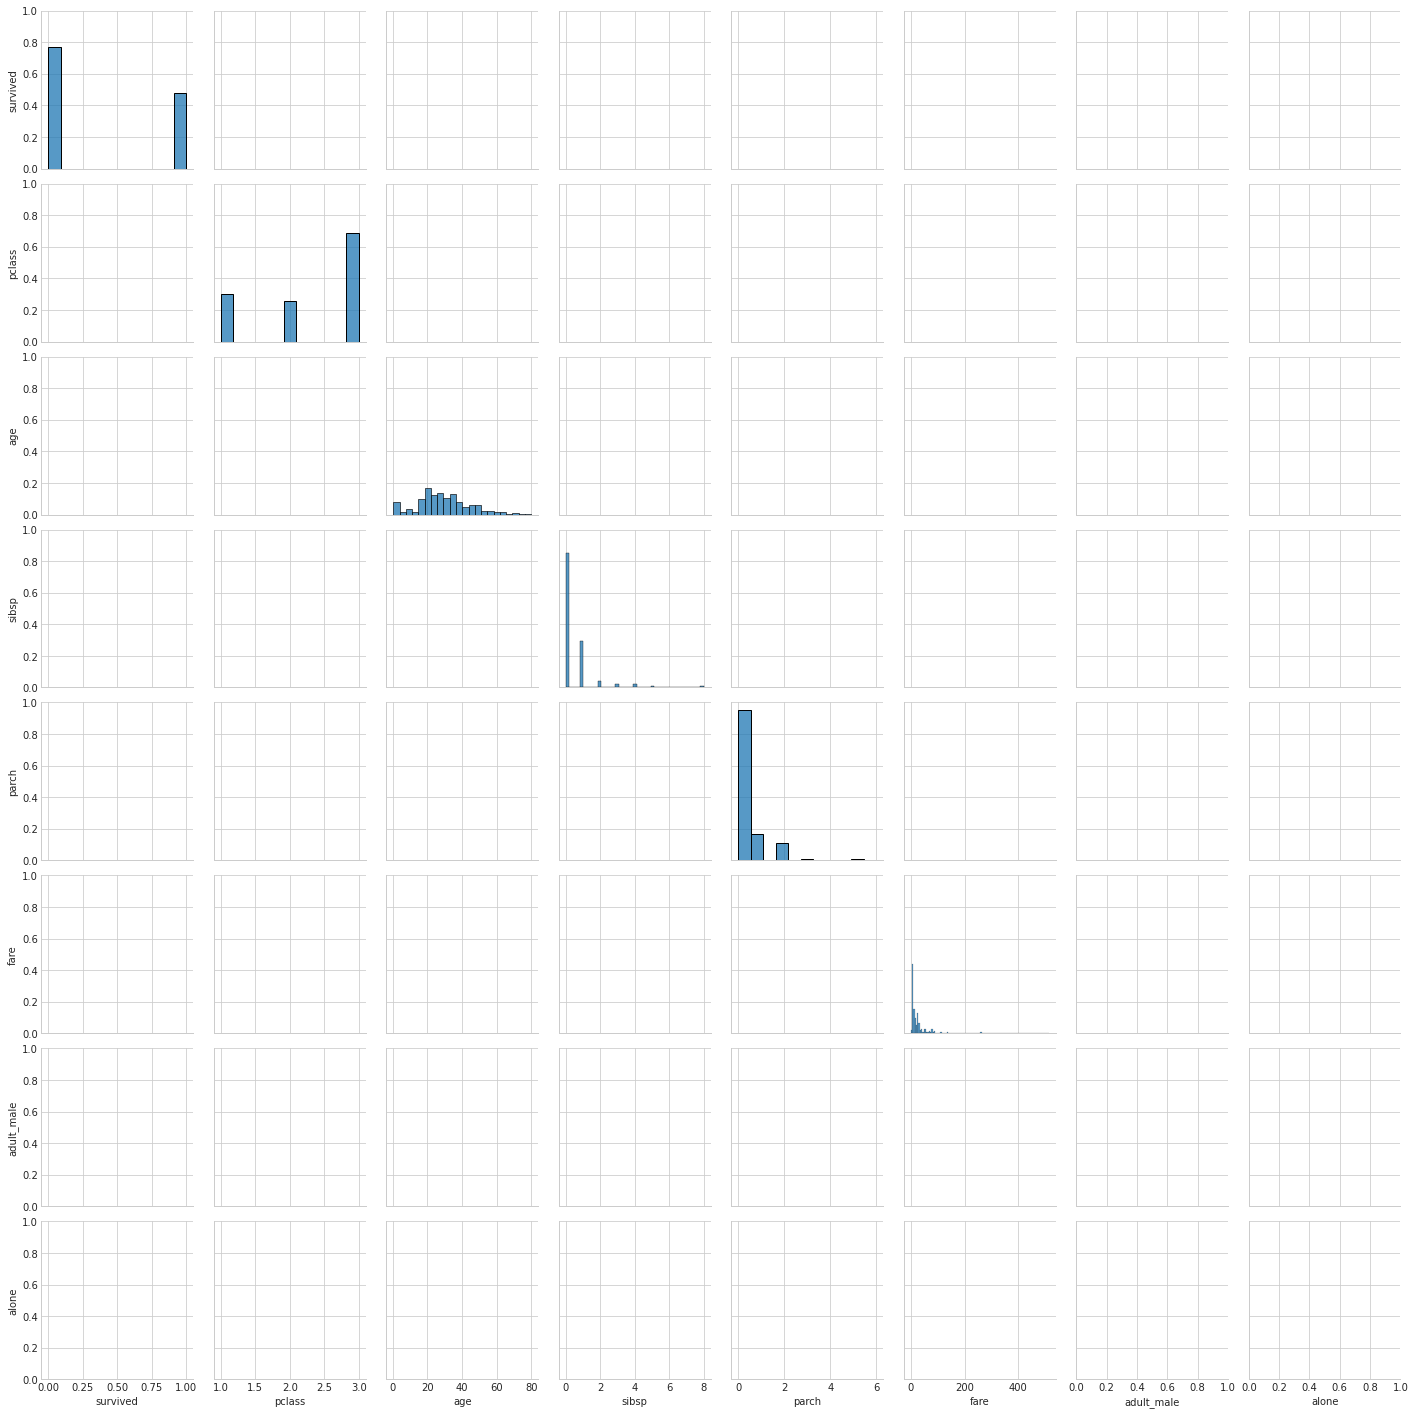

In [46]:
## Pairwise relationship
plt.rc("text", usetex=False)
sns.pairplot(titanic_df.fillna(method="pad"))


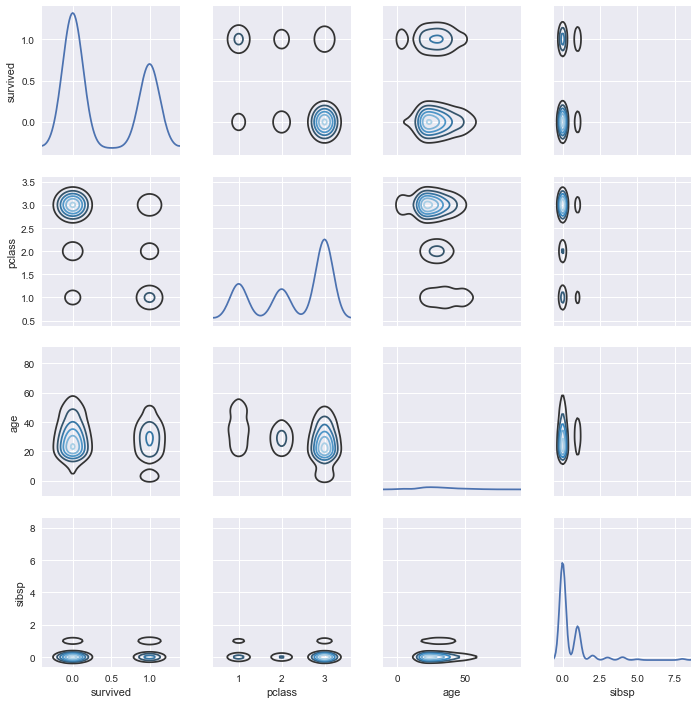

In [ ]:
g = sns.PairGrid(titanic_df.iloc[:, :5].fillna(method="pad"))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)


## Categorical variables

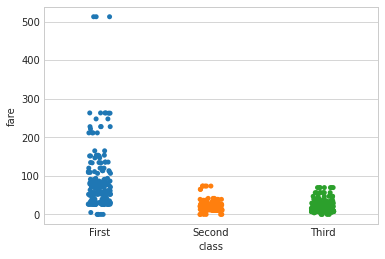

In [47]:
sns.stripplot(x="class", y="fare", data=titanic_df, jitter=True)


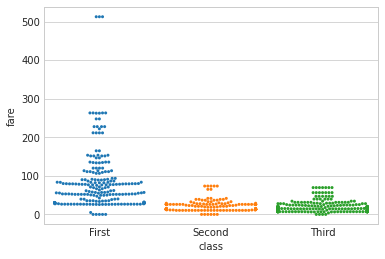

In [58]:
## Spread the data using algorithm to avoid overlapping
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.swarmplot(x="class", y="fare", data=titanic_df, size=3)


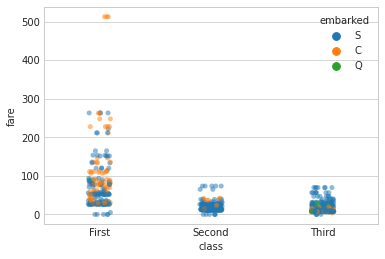

In [49]:
## Spread the data using algorithm to avoid overlapping
sns.stripplot(
    x="class", y="fare", hue="embarked", data=titanic_df, jitter=True, alpha=0.5
)


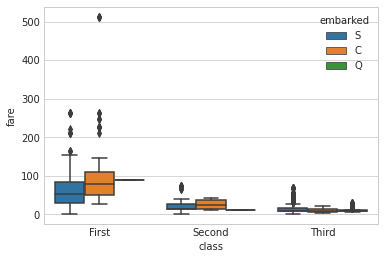

In [50]:
# boxplot

sns.boxplot(x="class", y="fare", hue="embarked", data=titanic_df)


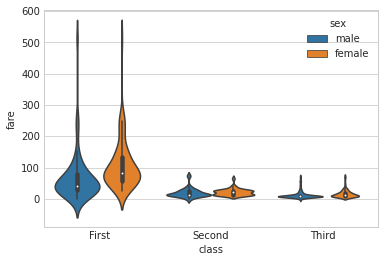

In [59]:
## density
sns.violinplot(x="class", y="fare", hue="sex", data=titanic_df)


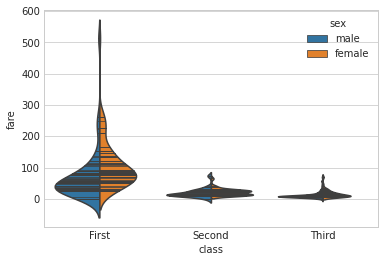

In [60]:
sns.violinplot(
    x="class", y="fare", hue="sex", data=titanic_df, split=True, inner="stick"
)


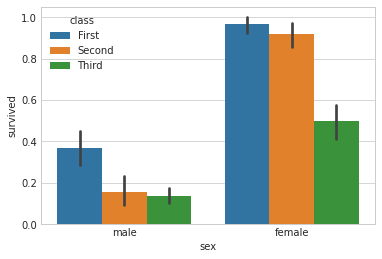

In [61]:
## barplot

sns.barplot(x="sex", y="survived", hue="class", data=titanic_df)


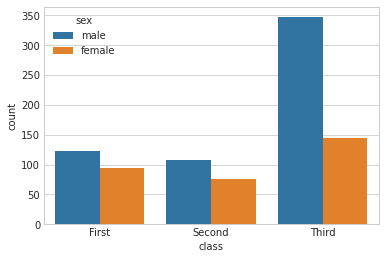

In [62]:
# countplot
sns.countplot(x="class", hue="sex", data=titanic_df)


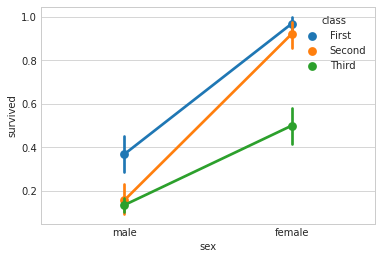

In [63]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic_df)


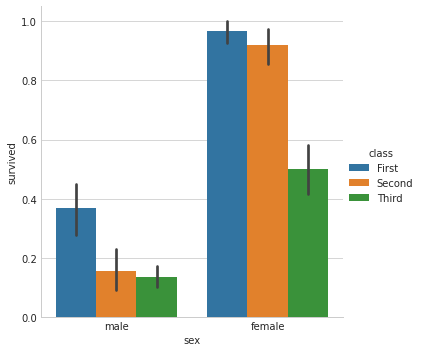

In [65]:
## catplot

sns.catplot(x="sex", y="survived", hue="class", data=titanic_df, kind="bar")


## Linear relationships

In [66]:
tips_df = sns.load_dataset("tips")

tips_df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


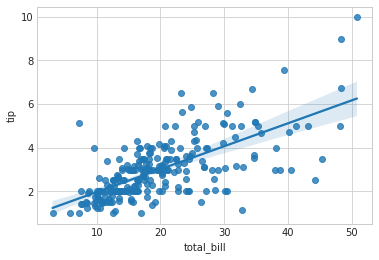

In [67]:
sns.regplot(x="total_bill", y="tip", data=tips_df)


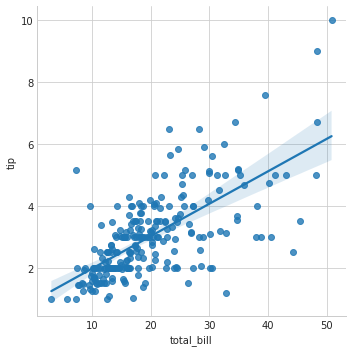

In [68]:
sns.lmplot(x="total_bill", y="tip", data=tips_df)


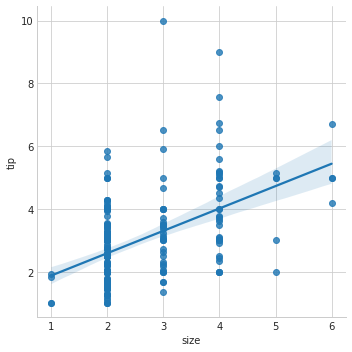

In [69]:
## We can have some summary statistics on the x-axis
import numpy as np

sns.lmplot(x="size", y="tip", data=tips_df)


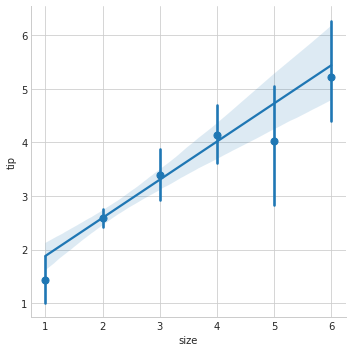

In [70]:
sns.lmplot(x="size", y="tip", data=tips_df, x_estimator=np.mean)


In [71]:
anscombe_df = sns.load_dataset("anscombe")

anscombe_df


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


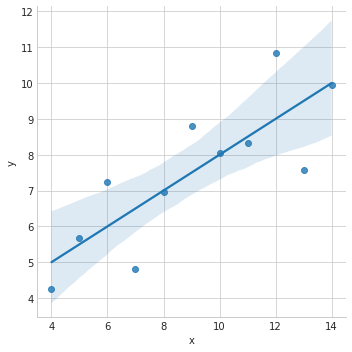

In [72]:
sns.lmplot(x="x", y="y", data=anscombe_df.loc[anscombe_df["dataset"] == "I"], order=1)


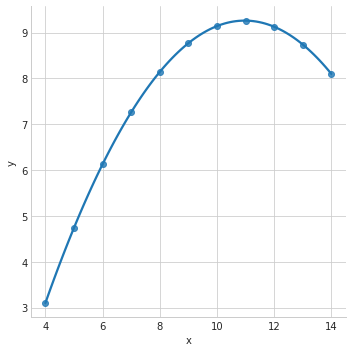

In [73]:
sns.lmplot(x="x", y="y", data=anscombe_df.loc[anscombe_df["dataset"] == "II"], order=2)


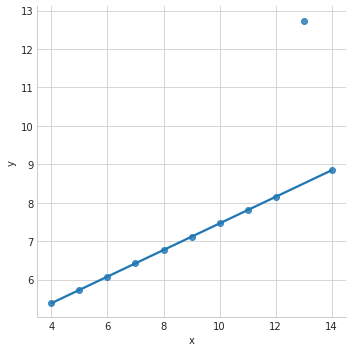

In [75]:
sns.lmplot(
    x="x",
    y="y",
    data=anscombe_df.loc[anscombe_df["dataset"] == "III"],
    order=1,
    robust=True,
    ci=None,
)


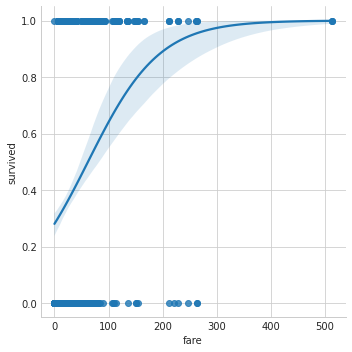

In [78]:
sns.lmplot(x="fare", y="survived", data=titanic_df, logistic=True)


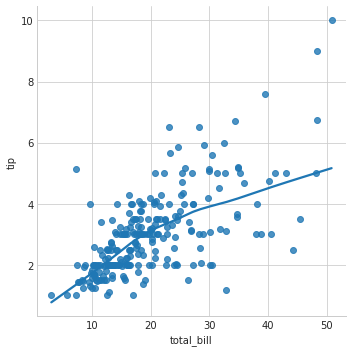

In [77]:
sns.lmplot(x="total_bill", y="tip", data=tips_df, lowess=True)


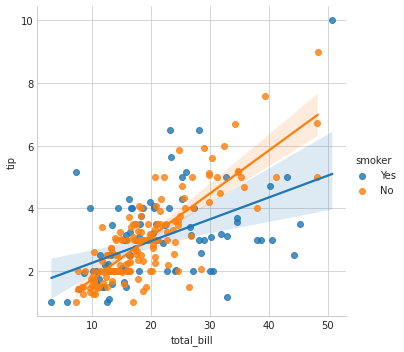

In [79]:
sns.lmplot(x="total_bill", y="tip", data=tips_df, hue="smoker")


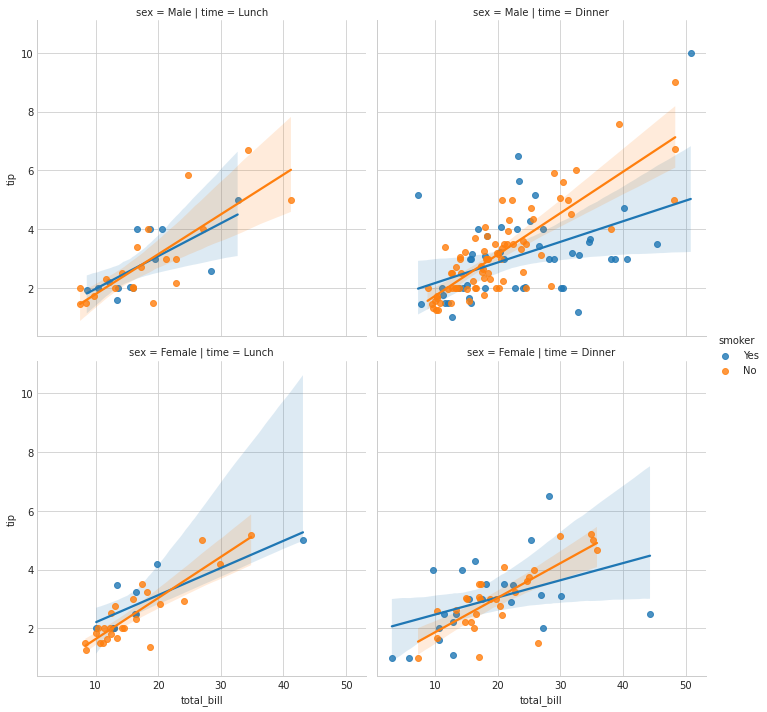

In [80]:
sns.lmplot(x="total_bill", y="tip", col="time", row="sex", hue="smoker", data=tips_df)


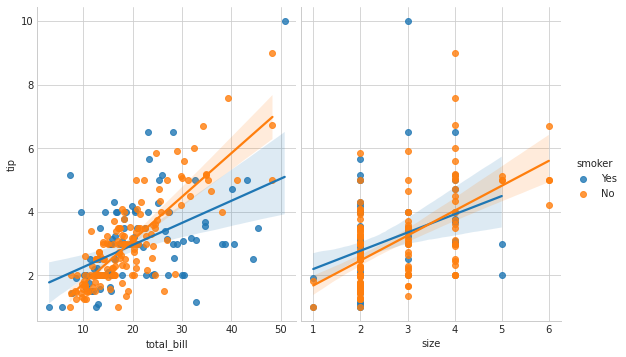

In [82]:
sns.pairplot(
    tips_df,
    x_vars=["total_bill", "size"],
    y_vars=["tip"],
    hue="smoker",
    height=5,
    aspect=0.8,
    kind="reg",
)


## Facetgrid

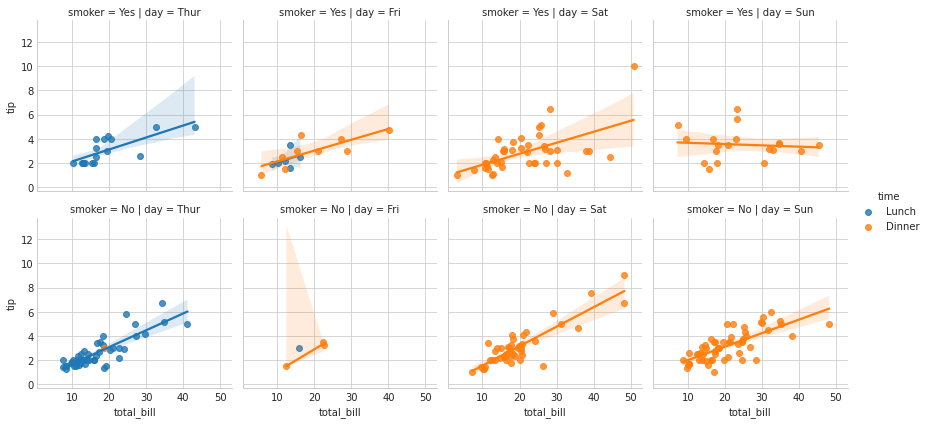

In [83]:
g = sns.FacetGrid(tips_df, row="smoker", col="day", hue="time")
g.map(sns.regplot, "total_bill", "tip")
g.add_legend()


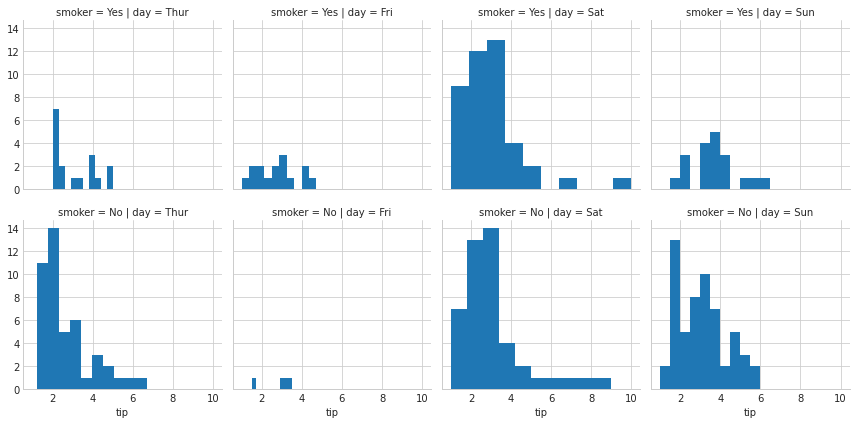

In [84]:
g = sns.FacetGrid(tips_df, row="smoker", col="day")
g.map(plt.hist, "tip")
